# Fine Tuning For BERT Models with TPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# google drive'e baglanmak icin

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# sadece edit'ten notebook ayarlarindan tpu secmek yeterli degil
# buradaki kodlari da calistirmamiz gerekiyor

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.51.219.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.51.219.82:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

# tpu secildikten sonra strategy seklinde bir object olusturmamiz gerekiyor tpu'dan faydalanmak icin

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
!pip install transformers

# bert'in hazir modellerini kullanmak icin transformers'i indirmem gerekiyor

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 52.3 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 6.5 MB 44.1 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import Library

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/hepsiburada.csv', encoding="utf-8")

In [7]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [8]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

In [9]:
df.Rating = df.Rating.map({1:0, 0:1})

# olumsuz 1 olumlu 0 olsun boylece olumsuz'lari takip edebilmek icin degistirdim

In [10]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [11]:
X = df['Review'].values
y = df['Rating'].values

## Tokenization

### Fixing token counts of all documents

In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")
# hugging face'de onceden egitilmis turkce bert modeli
# cased oldugu icin buyuk ve kucuk harfler ayri ayri ele alinmistir
# uncased hepsi kucuk harf

# https://huggingface.co/dbmdz/bert-base-turkish-cased

max_len = 0

# For every sentence...
max_token = []
for sent in X: # butun yorumlarimi teker teker aliyorum

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    # her cumlemi teker teker tokenlerine ayiriyorum
    # uncased versiyonunda turkce karakterler olmadigi icin cased secilip encode icinde lower() islemine tabi tuttuk
    # add_special_tokens=True ile her cumlemin basina ve sonunda ozel tokenleri eklemesini sagliyoruz

    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/245k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  758


In [14]:
text = "Şentepeli Şükrü abi?".lower()
 
tokenizer.tokenize(text)

['şen', '##tepe', '##li', 'şük', '##rü', 'abi', '?']

In [15]:
sentence = "Şentepeli Şükrü abi?".lower()
tokens = tokenizer.encode(sentence, add_special_tokens=True)
print(tokens)
print(len(tokens))

[2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3]
9


In [16]:
sentence = "Şentepeli Şükrü abi?".lower()
tokens = tokenizer.encode_plus(sentence, add_special_tokens=True)
print(tokens)

# burada classification yaptigimiz icin token_type_ids bizim icin onemli degil
# token_type_ids modele ayni anda iki cumle verecegimiz zaman onemli, ornegin translation esnasinda

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [17]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))

[ True False  True  True False False]
3


In [18]:
np.array(max_token).mean()

36.4837390193719

In [19]:
sum(np.array(max_token) < 158) / len(max_token)

# 158 token sabit secildiginde tum cumlelerimin %98'ini hic bir bilgi kaybi olmadan elde tutabiliyorum

0.9872688369877247

In [20]:
len(X)

243497

In [21]:
def transformation(X):
  # set array dimensions
  seq_len = 160
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [22]:
Xids, Xmask = transformation(X)

In [23]:
Xids.shape

(243497, 160)

In [24]:
Xmask.shape

(243497, 160)

In [25]:
sentence = "Şentepeli Şükrü abi?".lower()
tokens = tokenizer.encode_plus(sentence.lower(), max_length=20, truncation=True,
                                      padding='max_length', add_special_tokens=True)
print(tokens)

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [26]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
Xids

array([[2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.7820e+03, 3.1200e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 3.8070e+03, 9.2500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1560e+03, 4.1650e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.6807e+04, 1.9870e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [28]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [29]:
from tensorflow.keras.utils import to_categorical

l = np.array([1, 0, 2, 3, 4])
to_categorical(l, 5) 

# bert modellerinde output'umuzu da one hot encoding seklinde duzenlememiz gerekiyor
# modelim multiple ise bu sekilde one hot encoding yapmam gerekiyor

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
np.array([1, 0, 1, 0, 0]).reshape(-1,1) #reshape(5,1)

# modelim binary ise bu sekilde donusum yapabilirim

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
labels = y.reshape(-1,1)
labels

# target label'im y oldugu icin y'yi tek sutuna donusturuyorum binary oldugu icin

# input ve output'lari bu sekilde matrix formuna donusturmemin sebebi tensor olusturacagimiz icin

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))
dataset

# bert modeline vermek icin datasetimi olusturuyorum
# tensor donusum islemini yapiyorum burada

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [34]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels
    # modele input ve output'u tanitma islemini yapiyorum burada
    # dictionary icinde input'umu etiket isimleri ile birlikte vermem gerekiyor
    # input ve output'u dictionary ile ayiriyorum

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

# boylece bert modeline verilecek datasetimi olusturmus oldum
# datasetindeki input ve output tanimlamasini da yaptim

In [35]:
dataset

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(160,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(160,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Train Test Split

In [36]:
batch_size = 32
# batch_size 16 veya 32 olabilir bert modeli icin, daha baska bir deger olamaz

# fit into a batch of 32
dataset = dataset.shuffle(243500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

# satir sayisindan buyuk bir rakam yazarsaniz data setini en mukemmel sekilde shuffle yapar
# bizim datasetimizde 243497 satir oldugu icin daha buyuk bir sayi yazdik
# reshuffle_each_iteration=False olmali overfitting'i engellemek icin
# .batch islemi ile karilmis datasetini 32'lik gruplara ayir islemini yapiyoruz
# drop_remainder=True ile modelime 32'li paketlere ayrilmasi gerektigini belirtmis oluyorum

In [37]:
dataset

# datam 32'li paketlere bolundu

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [38]:
# set split size (90% training data) and calculate training set size
split = 0.9
# bert modellerinde genellikle train icin toplam datanin yuzde 90'i alinir
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size) # ilk 6848 paketi train'e al
val_ds = dataset.skip(size) # ilk 6848 paketi atla, gerisini test'e al

In [39]:
print(len(dataset)) # 32'i paket olarak 7609 tane var
print(len(dataset)*0.9)
print(int(len(dataset)*0.9)) # burada toplam paketlerimin yuzde 90'ini train seti olarak ayarliyorum

7609
6848.1
6848


In [40]:
Xids.shape

(243497, 160)

In [41]:
#batch_size=32
int(Xids.shape[0]/batch_size)

7609

## Adamw optimization

In [42]:
!pip install -q tf-models-official

# adamw optimization'ini kullanmak icin bu kodu oncesinde calistirmam gerekiyor

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.6 MB/s 
     |████████████████████████████████| 1.1 MB 42.4 MB/s 
     |████████████████████████████████| 47.8 MB 34.7 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 99 kB 6.5 MB/s 
     |████████████████████████████████| 4.9 MB 34.9 MB/s 
     |████████████████████████████████| 90 kB 6.7 MB/s 
     |████████████████████████████████| 352 kB 61.8 MB/s 
     |████████████████████████████████| 636 kB 54.5 MB/s 
     |████████████████████████████████| 237 kB 50.0 MB/s 
     |████████████████████████████████| 462 kB 45.9 MB/s 


In [43]:
len(train_ds)

6848

In [44]:
from official.nlp import optimization 
epochs = 1
# epoch sayisi 1, 2 veya 3 olmasi gerekir, cunku 3'ten sonra model overfitting'e gidiyor
# batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
# learning rate icin onerilen uc deger vardir
# bunlarin disinda bir learning rate kullanilmasi tavsiye edilmez
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')      

## Creating Model

In [45]:
def create_model():
    from transformers import TFAutoModel # import islemini fonksiyonun icinde yapmam lazim, aksi takdirde hata alirim
    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")
    # hugging face'deki turkce bert modelini cagiriyoruz burada
    input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32')
    # name icine 'input_ids' seklinde tanimlama yapmamiz gerekir
    # bert modeller int32 olarak belirtilmelidir
    attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')
    # attention mask da bir input oldugunu belirtmek icin name icine attention_mask yazmamiz gerekiyor
    # 160 yazdigimiz yere en fazla 512 yazabiliriz, 512 yazdigimizda da calisma suresi cok uzun surer
    # biz token sayimiz olarak 160 sectigimiz icin bu sekilde yazdik, ancak en basta kac belirlersek ve ona gore ayarlama yaparsak onu yazariz

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]
    # burada bert modelinin egitilmis ve sonuca erisilmis word embeddinglerini embeddings seklinde aliyorum
    # benim corpus'umda bulunan tum tokenlere ait bert modelince elde edilmis word embedding'leri almis oluyorum
    # bert'in elimizdeki token'leri word embedding'lere donusturememe ihtimali yok, ne kadar sacma bir token olsa da bert bir embedding sunar

    x = tf.keras.layers.Dense(160, activation='relu')(embeddings) # burada bu embeddingleri dense layer'a aktar demek
    # burada 160 sayisiyla oynayabiliriz
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x)
    # tavsiye edilen dropout sayisi 0.1'dir, duruma gore artirma yapilabilir
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

# tpu'yu kullanabilmek icin modeli tanimladigimiz yer icin bir fonksiyon yazmamiz gerekiyor
# TFAutoModel'i kullaniyoruz cunku biz tensorflow'da calisan bert modelini kullanmak istiyoruz

In [46]:
with strategy.scope():
  
  optimizer = optimizer # tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08)
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

Some layers from the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [47]:
pd.Series(y).value_counts(normalize=True)

# eger bir agirliklandirma kullanmak istersem bu sekilde kontrol ediyorum

0    0.943835
1    0.056165
dtype: float64

In [ ]:
# weights = {0:0.05, 1:0.95}
# yukaridaki sayilara gore agirliklandirma yapabilirim

In [48]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                           

In [49]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

6848/6848 [==============================] - 663s 87ms/step - loss: 0.0895 - recall: 0.6670 - val_loss: 0.0622 - val_recall: 0.7754


## Model evaluation

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = []
for i in val_ds:
  for j in np.array(i[1]):
    y_test.append(j)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22994
           1       0.87      0.78      0.82      1358

    accuracy                           0.98     24352
   macro avg       0.93      0.88      0.90     24352
weighted avg       0.98      0.98      0.98     24352



In [51]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = []
for i in train_ds:
  for j in np.array(i[1]):
    y_train.append(j)

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    206818
           1       0.92      0.82      0.87     12318

    accuracy                           0.99    219136
   macro avg       0.95      0.91      0.93    219136
weighted avg       0.99      0.99      0.99    219136



In [60]:
val_ds

<SkipDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [52]:
for i in val_ds:
  print(np.array(i))
  break

[{'input_ids': <tf.Tensor: shape=(32, 160), dtype=float64, numpy=
 array([[2.0000e+00, 1.2540e+04, 1.0060e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 2.7820e+03, 2.0480e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 4.0330e+03, 3.1950e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.0000e+00, 9.8770e+03, 6.9060e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 6.9160e+03, 1.6593e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 9.8770e+03, 1.1822e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])>, 'attention_mask': <tf.Tensor: shape=(32, 160), dtype=float64, numpy=
 array([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]])>}
 <tf.Tensor: shape=(32,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [64]:
for i in val_ds:
  print(np.array(i[1]))
  break

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


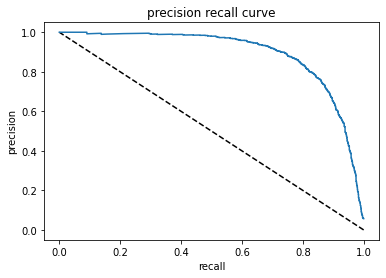

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [55]:
average_precision_score(y_test, y_pred_proba)

0.8917590972487957

In [56]:
model3.save("sentiment_model_without_weighted.h5")

In [57]:
!pip install -q tf-models-official

# modeli geri cagiracagim zaman tekrar install islemi yapmam gerekiyor

In [58]:
import tensorflow as tf
import official.nlp.optimization as adamw
from tensorflow.keras.models import load_model


model4 = load_model('/content/drive/MyDrive/Colab Datasets/sentiment_model_without_weighted.h5', custom_objects={'AdamWeightDecay':adamw.AdamWeightDecay})

In [59]:
# initialize tokenizer from transformers
from transformers import AutoTokenizer, TFAutoModel

tokenizers = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

def prep_data(text):
    # tokenize to get input IDs and attention mask tensors
    tokens = tokenizers.encode_plus(text.lower(), max_length=160,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf') # tensorflow uzerinde calistigimiz icin tf olarak belirtmemiz gerekiyor
  
    return {'input_ids': tokens['input_ids'],      # tf.cast(tokens['input_ids'], tf.int32)
            'attention_mask': tokens['attention_mask']} # tf.cast(tokens['attention_mask'], tf.int32)

In [65]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
review15 = "alınca anlarsın anyayı konyayı"
review16 = "çöpe atacak paran varsa alabilirsin"
review17= "Telefon fena değil"
review18 = "al da gününü gör"
review19 = "Ürün süper ama satıcı ve kargo berbat"
review20= "kargo süper ama ürün berbat"
review21 = "Aldigim TV cok kaliteli diye dusunmustum, sonradan cok da iyi bir TV olmadigini dusundum, ama neyse yine de memnunum."
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16, review17, review18, review19, review20, review21]

In [66]:
probs = []
for i in reviews:

  in_tensor = prep_data(i) # tensor'e donusturuyorum yorumlarimi

  prob = model4.predict(in_tensor)[0][0]

  probs.append(prob)

In [67]:
probs

# 0'a yakin olanlar olumlu yorum, 1'e yakin olanlar olumsuz yorum

[0.00036880374,
 0.00031673908,
 0.997937,
 0.0010409057,
 0.9774188,
 0.9965811,
 0.00072953105,
 0.98935294,
 0.00034806132,
 0.99317366,
 0.000487715,
 0.09299049,
 0.9014711,
 0.0018772483,
 0.011179566,
 0.094623566,
 0.16623268,
 0.002459377,
 0.010751128,
 0.90547407,
 0.0067027807]

In [68]:
classes  = (np.array(probs) >= 0.5).astype("int") # probability'si 0.5'ten buyukse True yapar, astype da True'yu 1'e cevirir
classes

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [69]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [70]:
pd.set_option('display.max_colwidth', None) # None yerine -1 de yazilabilir, yorumlari okunabilir sekilde yazdirabilmek icin
pd.DataFrame(my_dict)

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.000369,0
1,süper ürün aynı gün elime geçti,0.000317,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.997937,1
3,kelimelerle tarif edilemez,0.001041,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.977419,1
5,hiç resimde gösterildiği gibi değil,0.996581,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler,0.000730,0
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.989353,1
8,tam bir fiyat performans ürünü,0.000348,0
9,beklediğim gibi çıkmadı,0.993174,1
